# 정규화(Regularization)

모델이 너무 간단해서 복잡한 곡선 관계를 학습할 수 없는 경우 => 편향(Bais)이 높다.<br>
분산은 다양한 테스트 데이터가 주어졌을 때 모델의 성능이 얼마나 일관적인지 나타냄.<br>
ex) 과적합(overfitting)

편향이 높고 분산이 낮음 => 과소적합(underfit)<br>
편향이 낮고 분산이 높음 => 과적합(overfit)


적절한 편향과 분산: 편향-분산 트레이드 오프(Bias-Variance Tradeoff)

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures

from math import sqrt

import numpy as np
import pandas as pd

In [5]:
FILE_PATH = 'datasets/admission_data.csv'
admission_data_df = pd.read_csv(FILE_PATH)
admission_data_df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [29]:
X = admission_data_df.drop(['Chance of Admit '], axis=1)

#육차식 변환기
polynomial_transformer = PolynomialFeatures(6)
#feature를 값 변환
polynomial_features = polynomial_transformer.fit_transform(X.values)
#feature name를 반환
features = polynomial_transformer.get_feature_names(X.columns)

X = pd.DataFrame(polynomial_features, columns = features)
X.head()

,1,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Serial No.^2,...,LOR CGPA^2 Research^3,LOR CGPA Research^4,LOR Research^5,CGPA^6,CGPA^5 Research,CGPA^4 Research^2,CGPA^3 Research^3,CGPA^2 Research^4,CGPA Research^5,Research^6
0,1.0,1.0,337.0,118.0,4.0,4.5,4.5,9.65,1.0,1.0,...,419.05125,43.425,4.5,807539.696082,83682.870060,8671.800006,898.632125,93.1225,9.65,1.0
1,1.0,2.0,324.0,107.0,4.0,4.0,4.5,8.87,1.0,4.0,...,354.04605,39.915,4.5,487014.306256,54905.784245,6190.054594,697.864103,78.6769,8.87,1.0
2,1.0,3.0,316.0,104.0,3.0,3.0,3.5,8.00,1.0,9.0,...,224.00000,28.000,3.5,262144.000000,32768.000000,4096.000000,512.000000,64.0000,8.00,1.0
3,1.0,4.0,322.0,110.0,3.0,3.5,2.5,8.67,1.0,16.0,...,187.92225,21.675,2.5,424731.610940,48988.651781,5650.363527,651.714363,75.1689,8.67,1.0
4,1.0,5.0,314.0,103.0,2.0,2.0,3.0,8.21,0.0,25.0,...,0.00000,0.000,0.0,306237.903347,0.000000,0.000000,0.000000,0.0000,0.00,0.0


In [30]:
y = admission_data_df[['Chance of Admit ']]
y.head()

,Chance of Admit
0,0.92
1,0.76
2,0.72
3,0.80
4,0.65


In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=5)

In [39]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [40]:
y_train_predict = model.predict(X_train)
mse = sqrt(mean_squared_error(y_train_predict, y_train))

print("train set에서의 성능:")
print(mse)

y_test_predict = model.predict(X_test)
mse = sqrt(mean_squared_error(y_test_predict, y_test))

print("test set에서의 성능:")
print(mse)

train set에서의 성능:
8.280430222470489e-10
test set에서의 성능:
0.9952571528076237


### 위 모델은 과적합(overfit)됨

# 정규화(Regularization)

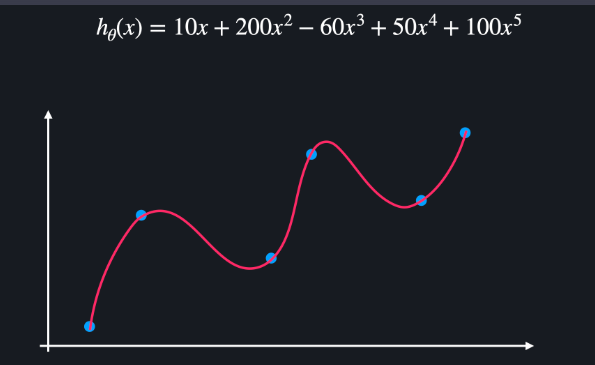
#### theta값이 크기 때문에 급격하게 변함.
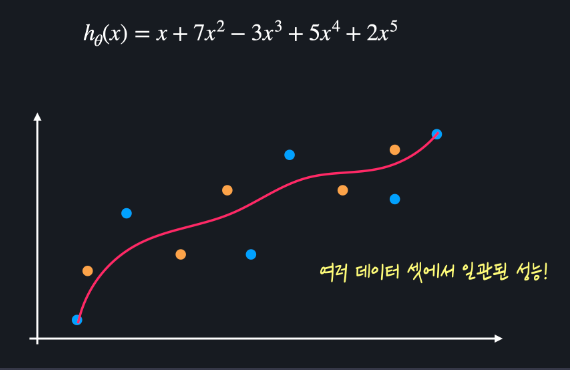
#### theta 값들을 줄여서 완만하게 변함.

# L1 정규화, Lasso Regression, Lasso 모델
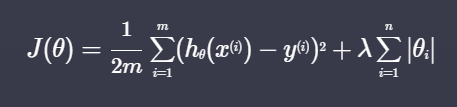

# L2 정규화, Ridge Regression, Ridge 모델
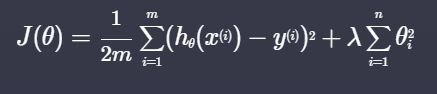

In [52]:
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures

from math import sqrt

import numpy as np
import pandas as pd

In [51]:
FILE_PATH = 'datasets/admission_data.csv'
admission_df = pd.read_csv(FILE_PATH).drop('Serial No.', axis=1)

X = admission_data_df.drop(['Chance of Admit '], axis=1)

#육차식 변환기
polynomial_transformer = PolynomialFeatures(6)
#feature를 값 변환
polynomial_features = polynomial_transformer.fit_transform(X.values)
#feature name를 반환
features = polynomial_transformer.get_feature_names(X.columns)

X = pd.DataFrame(polynomial_features, columns = features)
y = admission_data_df[['Chance of Admit ']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=5)

#Lasso모델을 사용
model = Lasso(alpha=0.001, max_iter=1000, normalize=True)
model.fit(X_train, y_train)

y_train_predict = model.predict(X_train)
mse = sqrt(mean_squared_error(y_train_predict, y_train))

print("Lasso train set에서의 성능:")
print(mse)

y_test_predict = model.predict(X_test)
mse = sqrt(mean_squared_error(y_test_predict, y_test))

print("Lasso test set에서의 성능:")
print(mse)

Lasso train set에서의 성능:
0.06336620966147144
Lasso test set에서의 성능:
0.06007719092689258


In [53]:
FILE_PATH = 'datasets/admission_data.csv'
admission_df = pd.read_csv(FILE_PATH).drop('Serial No.', axis=1)

X = admission_data_df.drop(['Chance of Admit '], axis=1)

#육차식 변환기
polynomial_transformer = PolynomialFeatures(6)
#feature를 값 변환
polynomial_features = polynomial_transformer.fit_transform(X.values)
#feature name를 반환
features = polynomial_transformer.get_feature_names(X.columns)

X = pd.DataFrame(polynomial_features, columns = features)
y = admission_data_df[['Chance of Admit ']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=5)

#Ridge모델 사용
model = Ridge(alpha=0.001, max_iter=1000, normalize=True)
model.fit(X_train, y_train)

y_train_predict = model.predict(X_train)
mse = sqrt(mean_squared_error(y_train_predict, y_train))

print("Ridge train set에서의 성능:")
print(mse)

y_test_predict = model.predict(X_test)
mse = sqrt(mean_squared_error(y_test_predict, y_test))

print("Ridge test set에서의 성능:")
print(mse)

Ridge train set에서의 성능:
0.05327825805894636
Ridge test set에서의 성능:
0.06669588064631883


https://ratsgo.github.io/machine%20learning/2017/05/22/RLR/

